# Imports

In [24]:
from glob import glob
from pathlib import Path
import shutil
from tqdm import tqdm
import os
import numpy as np
import plotly.express as px

from io import BytesIO
from zipfile import ZipFile
from subprocess import call, STDOUT
from urllib.request import urlopen


import requests
from matplotlib import cm, colors
from IPython.display import Image
import pandas as pd
from rdkit.Chem.PandasTools import AddMoleculeColumnToFrame
from Bio.PDB import PDBParser, PDBIO
import nglview as nv

from plipify.fingerprints import InteractionFingerprint
from plipify.visualization import (
    fingerprint_barplot, fingerprint_heatmap, fingerprint_table, 
    fingerprint_nglview, PymolVisualizer, nglview_color_side_chains_by_frequency,
    fingerprint_writepdb
)
from ipywidgets.embed import embed_minimal_html

from plipify.core import Structure

from html2image import Html2Image
import imgkit

## paths

In [77]:
# plipify_results_path = Path("/Volumes/Rohirrim/local_test/plipify_result_v2/plipify_results.csv")
plipify_results_path = Path("/Volumes/Rohirrim/local_test/plipify_result_melissa_prepped/plipify_results.csv")

## pocket definitions

In [78]:
pocket_definitions = {'P1': np.array([140,
                             141,
                             142,
                             143,
                             144,
                             145,
                             163,
                                      164,
                             172]),
                      'P1_prime': np.array([25,26,27]),
                      'P2': np.array([41,49,54, 187]),
                      'P3_4_5': np.array([165,166,167,168,189,190,191,192])}

# Load Plipify Results

In [79]:
df = pd.read_csv(plipify_results_path.resolve(), index_col=0)

In [80]:
df

,hydrophobic,hbond-don,hbond-acc,saltbridge,pistacking,pication,halogen
6,1,1,0,0,0,0,0
8,2,0,0,0,0,0,0
12,1,2,0,0,0,1,0
24,1,0,1,0,0,0,0
25,23,3,0,0,0,0,0
...,...,...,...,...,...,...,...
287,2,0,0,0,0,0,0
294,1,0,0,0,0,0,0
295,0,0,1,0,0,0,0
298,1,0,0,0,0,0,0


## filter results

In [81]:
# filter out some of the low counts
fp_focused = df[df.sum(axis=1) > 5]

In [82]:
fp_focused

,hydrophobic,hbond-don,hbond-acc,saltbridge,pistacking,pication,halogen
25,23,3,0,0,0,0,0
26,1,3,3,0,0,0,0
41,32,9,10,1,188,16,0
49,18,0,0,0,0,0,1
90,5,1,0,0,0,0,0
140,2,0,12,0,0,0,2
142,127,36,26,0,0,0,0
143,0,109,3,0,0,0,0
144,0,202,4,0,0,0,0
145,0,75,0,0,0,0,0


## add pocket definitions

In [83]:
fp_pockets = fp_focused.copy()
for pocket, resarray in pocket_definitions.items():
    fp_pockets.loc[fp_pockets.index.isin(resarray), 'Pocket'] = pocket

In [84]:
fp_pockets

,hydrophobic,hbond-don,hbond-acc,saltbridge,pistacking,pication,halogen,Pocket
25,23,3,0,0,0,0,0,P1_prime
26,1,3,3,0,0,0,0,P1_prime
41,32,9,10,1,188,16,0,P2
49,18,0,0,0,0,0,1,P2
90,5,1,0,0,0,0,0,NaN
140,2,0,12,0,0,0,2,P1
142,127,36,26,0,0,0,0,P1
143,0,109,3,0,0,0,0,P1
144,0,202,4,0,0,0,0,P1
145,0,75,0,0,0,0,0,P1


# Standard Plipify Figures

## barplot

In [85]:
fingerprint_barplot(fp_focused)

## heatmap

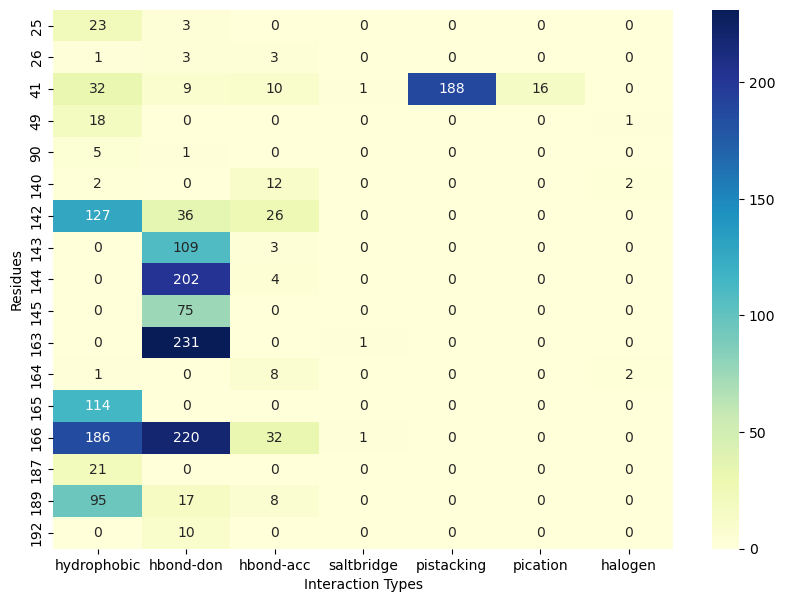

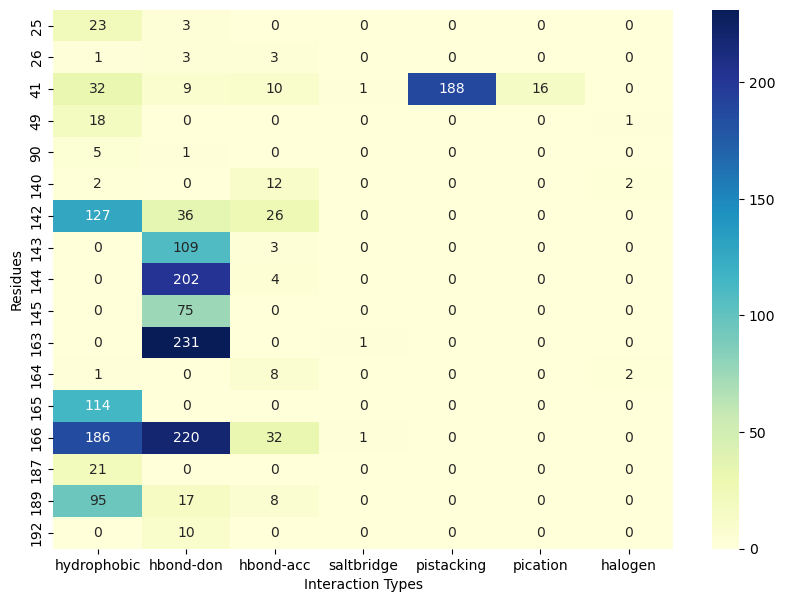

In [86]:
fingerprint_heatmap(fp_focused, cmap="YlGnBu")

## Table

In [87]:
mytable = fingerprint_table(fingerprint_df=fp_focused)

In [88]:
mytable

HTML(value='\n    <style>\n    \n\n    table.plipify-legend {\n        text-align: center;\n        color: #ff…

In [89]:
embed_minimal_html("plipify.html", mytable)

### convert html to image

In [90]:
imgkit.from_file('plipify.html', 'plipify.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [91]:
hti = Html2Image()
hti.screenshot(html_file='plipify.html', save_as='plipify.png')

objc[25633]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa5cfff8f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/109.0.5414.87/Libraries/libGLESv2.dylib (0x11250e880). One of the two will be used. Which one is undefined.
[0116/144248.758827:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
[0116/144249.669926:INFO:headless_shell.cc(223)] 32367 bytes written to file /Users/alexpayne/Scientific_Projects/covid-moonshot-manuscript/scripts/plipify_fig/plipify.png


['/Users/alexpayne/Scientific_Projects/covid-moonshot-manuscript/scripts/plipify_fig/plipify.png']

## make table for each pocket

In [92]:
for pocket in fp_pockets.Pocket:
    mytable = fingerprint_table(fingerprint_df=fp_focused[fp_pockets.Pocket == pocket])
    embed_minimal_html(f"{pocket}_plipify.html", mytable)